**MEDICAL COST ANALYSIS**

In [13]:
#Gerekli olabilecek tüm kütüphaneleri import ettim.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [14]:
# CSV dosyasını pd ile yükledim ve orijinal datayı bozmamak için copy'sini aldım.

data= pd.read_csv('insurance.csv')
df = data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
#Tüm dataların non-null olduğunu kontrol ettim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
#Analiz edeceğim "charges" verisinin tipini float'tan categorical'a dönüştürdüm.
df['charges'] = df['charges'].astype("category")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 108.2+ KB


In [20]:
# "charges" data tipi categorical olduğu için mean value alınamıyor.
df["charges"].mean()

TypeError: ignored

In [21]:
#BMI dağılımı

df.value_counts("bmi")

bmi
32.300    13
28.310     9
30.875     8
31.350     8
28.880     8
          ..
28.800     1
28.490     1
28.380     1
28.200     1
53.130     1
Length: 548, dtype: int64

<Axes: xlabel='bmi'>

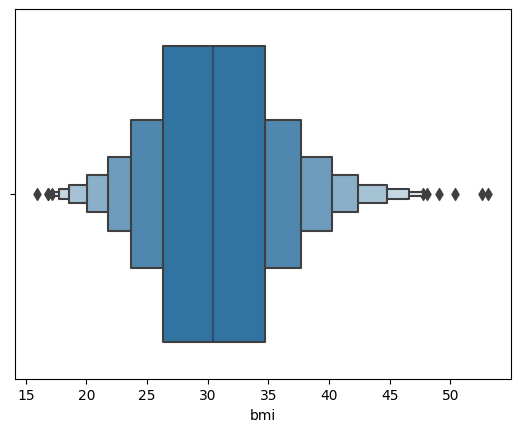

In [22]:
#Enhanced box plot grafiğiyle BMI dağılımını ve outlierları görünür kıldım.
sns.boxenplot(x = "bmi", data= df)

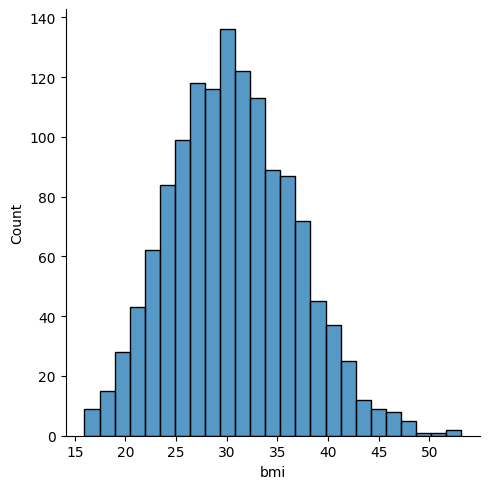

In [23]:
sns.displot(df, x= "bmi")

Text(0, 0.5, 'Charges')

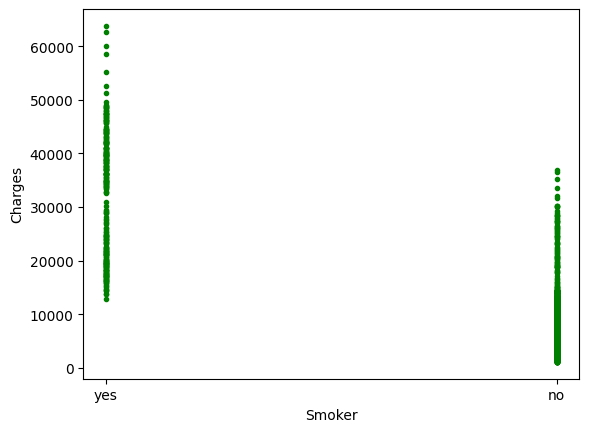

In [24]:
#Smoker-Charges ilişkisi

plt.plot(df.smoker, df.charges,'o',markersize=3, color='green')
plt.xlabel('Smoker')
plt.ylabel('Charges')

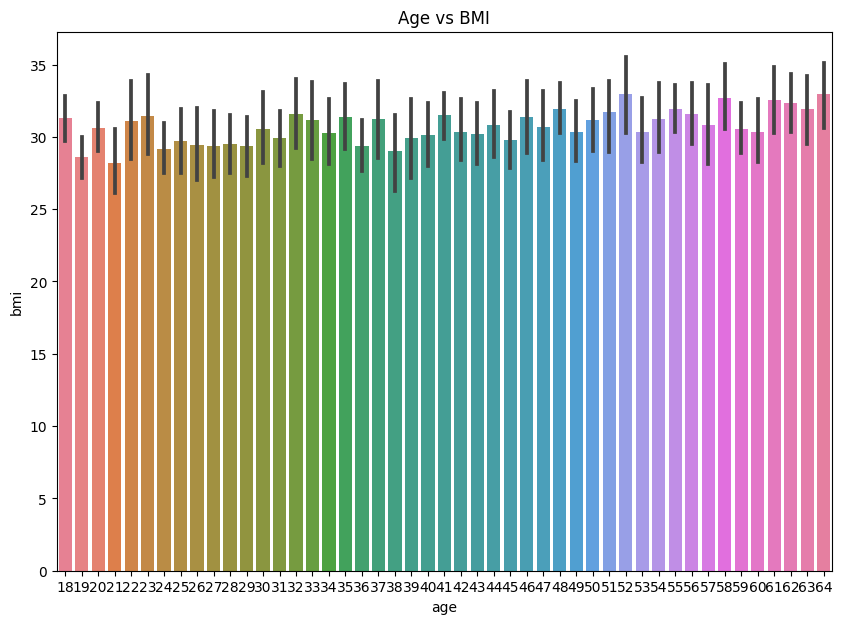

In [25]:
#Age-BMI İlişkisi

plt.figure(figsize=(10,7))
plt.title('Age vs BMI')
sns.barplot(x='age',y='bmi',data=df,palette='husl')
plt.savefig('/content/sample_data/AgevsBMI')


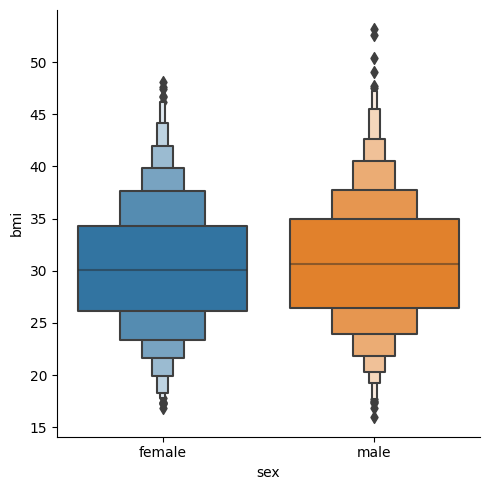

In [26]:
#BMI - Sex İlişkisi
sns.catplot(data=df.sort_values("sex"),
    x="sex", y="bmi", kind="boxen",)


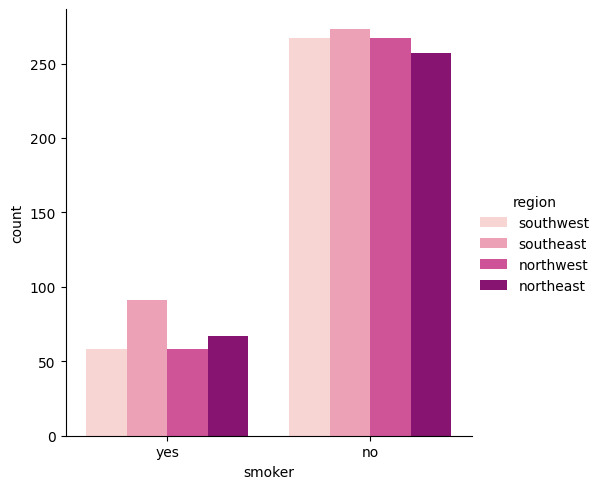

In [27]:
#Region-Smoker İlişkisi
sns.catplot(x="smoker", kind="count",hue = 'region', palette="RdPu", data=data)

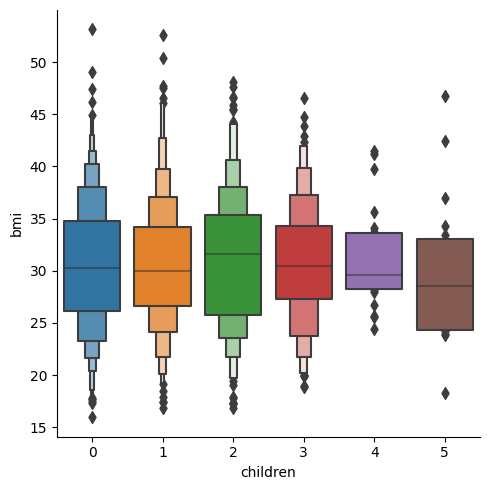

In [28]:
#Children-BMI İlişkisi
sns.catplot(data=df.sort_values("children"),
    x="children", y="bmi", kind="boxen",)

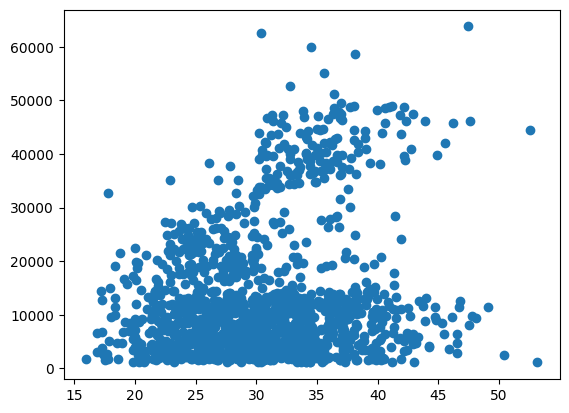

In [29]:
#BMI-Charges İlişkisi
plt.scatter(df['bmi'], df['charges'])
plt.show()

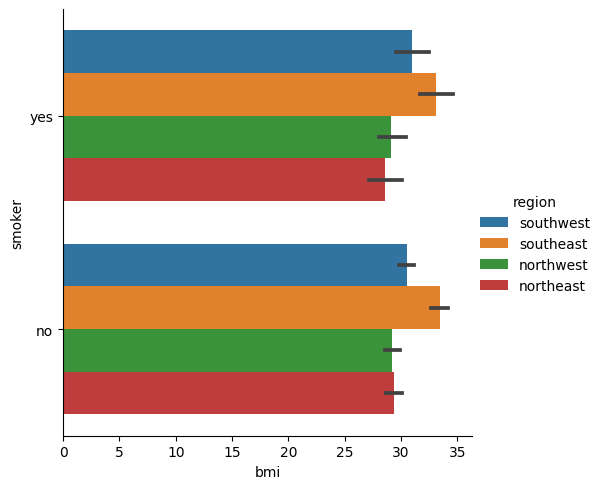

In [30]:
#Region-Smoker-BMI İlişkisi
sns.catplot(data=df, x="bmi", y="smoker", hue="region", kind="bar")

In [31]:
#sum() ile her region'daki çocuk sayısı toplamını bularak en çok çocuk sayısı olan region'u (southeast) buldum.

df.groupby("region")["children"].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

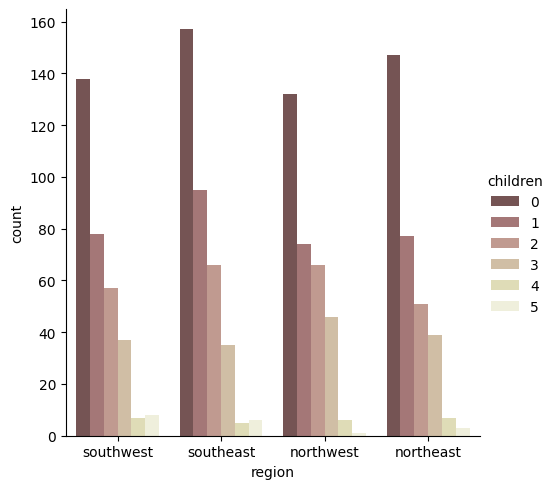

In [32]:
sns.catplot(x="region", kind="count",hue = 'children', palette="pink", data=df)

<Axes: xlabel='bmi'>

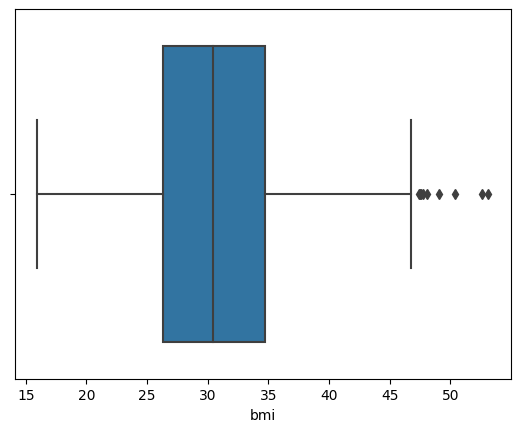

In [33]:
#BMI'daki outlierlar
sns.boxplot(x = "bmi", data= df)

In [34]:
# Sex kategorisindeki değerler
unique_values = df['sex'].unique()

print(unique_values)

['female' 'male']


In [35]:
#Region kategorisindeki değerler
unique_values = df['region'].unique()

print(unique_values)

['southwest' 'southeast' 'northwest' 'northeast']


In [36]:
#One-Hot Encoding tekniği ile Region'ları ayırarak sayısal veriye dönüştürdüm.

df = pd.get_dummies(df, columns=['region'])

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [37]:
#Label Encoding tekniğiyle kadın-erkek sayısal olarak temsil edildi.

clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},

               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)
df_copy


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [38]:
df_copy.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [41]:
#Charges verisini ayırıp y'ye atadım.
y = df_copy.charges
X = df_copy.drop(["charges"] , axis =1)
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0
1334,18,1,31.920,0,0,1,0,0,0
1335,18,1,36.850,0,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,0,1


In [42]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: category
Categories (1337, float64): [1121.8739, 1131.5066, 1135.9407, 1136.3994, ..., 58571.07448,
                             60021.39897, 62592.87309, 63770.42801]

In [48]:
#Dataseti train_test_split ile ayırdım.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y , test_size= 0.2, random_state= 0)

In [50]:
# Sklearn ile veri Normalizasyonu - Min Max Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# tek adımda fit ve transform
normalized = scaler.fit_transform(df_copy)

inverse = scaler.inverse_transform(normalized)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

# **Random Forest Regression**

In [52]:
#Preprocessed datayı eğitmek için RandomForestRegressor import ettim.

from sklearn.ensemble import RandomForestRegressor

In [53]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

#Random Forest tahmin değerlendirmesi için Mean Squared Error hesapladım.
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R2 skorunu hesapladım.
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 19082117.90253581
R2 Score: 0.8800846954019381


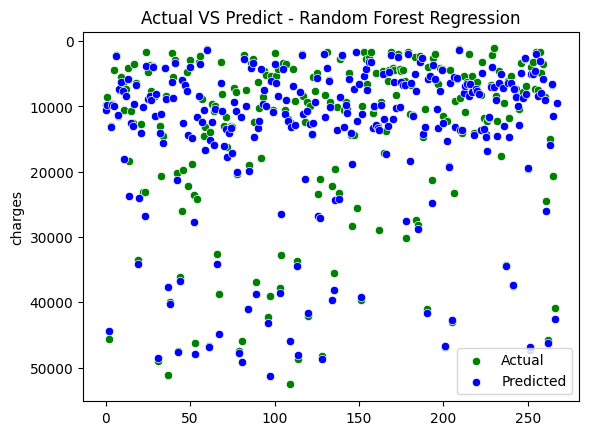

In [63]:
# Scatterplot ile gerçek ve RF tahmini değerlerini grafikle karşılaştırdım.

sns.scatterplot(y = y_test, x = range(len(y_test)), color  ='green', label = "Actual")
sns.scatterplot(y = y_pred, x = range(len(y_pred)), color = 'blue', label = "Predicted")
plt.title("Actual VS Predict - Random Forest Regression")
plt.show()

# **Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)


LinearRegression()

In [65]:
linreg_model.intercept_

-12327.377333522169

In [66]:
# Kategorilerin katsayıları
linreg_model.coef_

array([ 2.53700500e+02,  1.54637279e+01,  3.35962814e+02,  4.36910121e+02,
        2.36050173e+04,  4.83840068e+02,  2.23707336e+02, -4.29438766e+02,
       -2.78108638e+02])

In [67]:
X_test[:5]

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
578,52,0,30.200,1,0,0,0,0,1
610,47,1,29.370,1,0,0,0,1,0
569,48,0,40.565,2,1,0,1,0,0
1034,61,0,38.380,0,0,0,1,0,0
198,51,1,18.050,0,0,0,1,0,0


In [68]:
y_pred_test = linreg_model.predict(X_test)

In [69]:
y_pred_test[:5]

array([11169.92711879,  9486.70908541, 38181.12305256, 16266.31328948,
        6914.64800729])

In [71]:
#Cross Validation ile modelin performansını değerlendirdim.

cv_linear_reg = cross_val_score(estimator = linreg_model, X = X, y = y, cv = 10)

scores = cross_val_score(estimator= linreg_model, X = X_train , y= y_train , cv=5 )
print("Cross-validation scores:" , cv_linear_reg)
print("Mean score:" , cv_linear_reg.mean())
print("Std score:" , cv_linear_reg.std())

Cross-validation scores: [0.78599896 0.73249853 0.73491249 0.66880787 0.77174242 0.78401994
 0.79314562 0.66869189 0.74242455 0.76276472]
Mean score: 0.7445006998667606
Std score: 0.042944808516183645


In [73]:
#Training data için R2 Skoru
y_pred_train = linreg_model.predict(X_train)
r2_score_train_linear = r2_score(y_train, y_pred_train)

#Testing data için R2 Skoru
y_pred_test = linreg_model.predict(X_test)
r2_score_test_linear = r2_score(y_test, y_pred_test)

#Root mean squared error (RMSE)
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_linear))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_linear))
print('RMSE : {0:.3f}'.format(rmse_linear))

R2_score (Train Accuracy) : 0.737
R2_score (Test Accuracy) : 0.800
RMSE : 5641.627


In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
cv_pred = cross_val_predict(estimator= linreg_model , X= X_train , y=y_train , cv=5 )
print ("R2 score :" , metrics.r2_score( y_true= y_train, y_pred = cv_pred))

R2 score : 0.7326149556236796


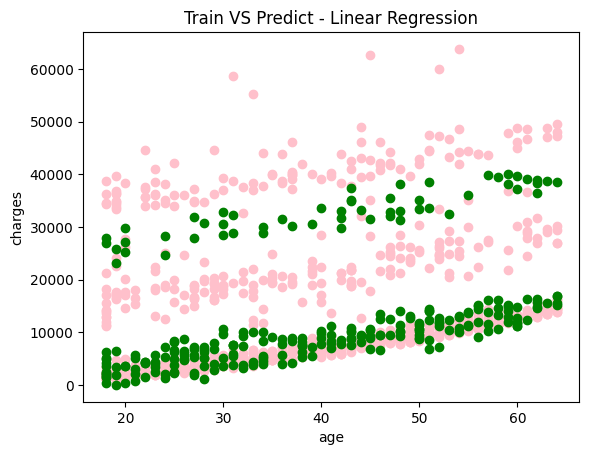

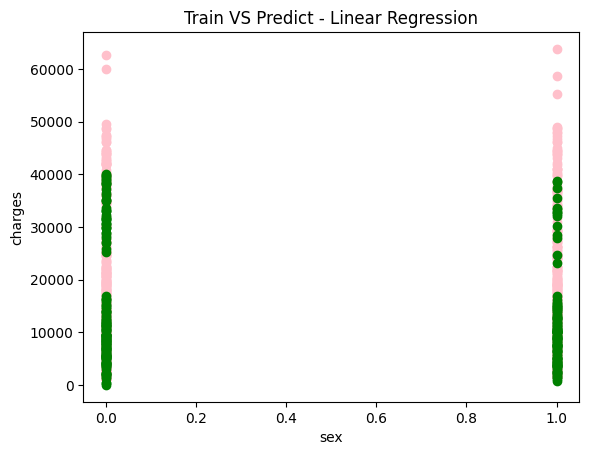

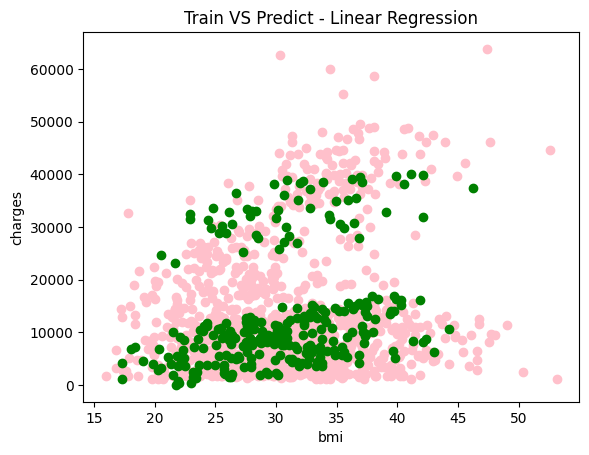

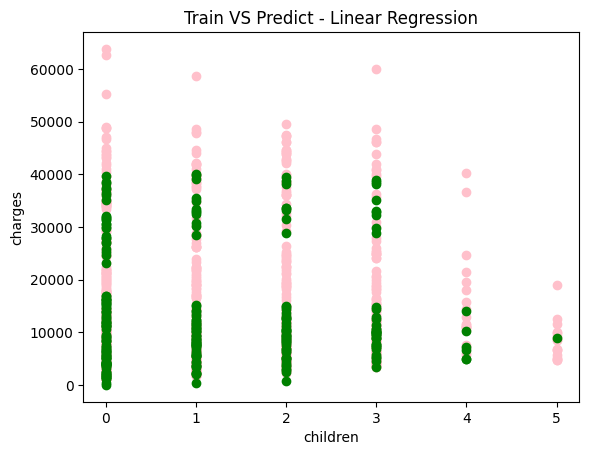

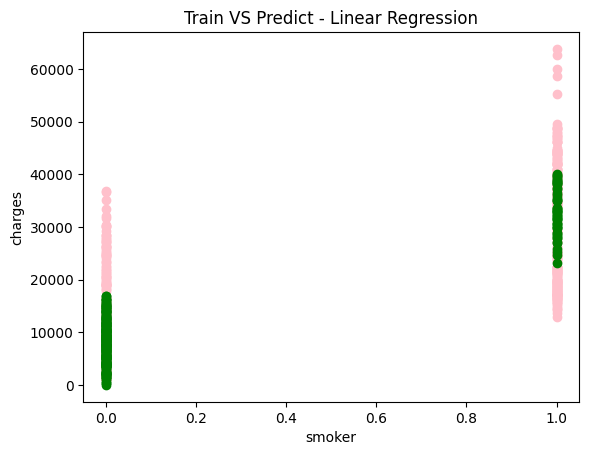

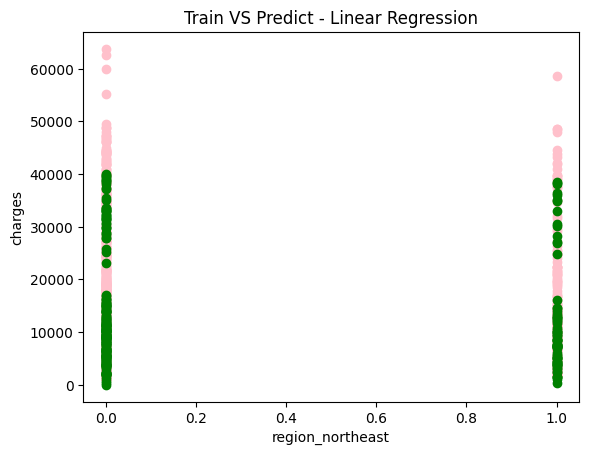

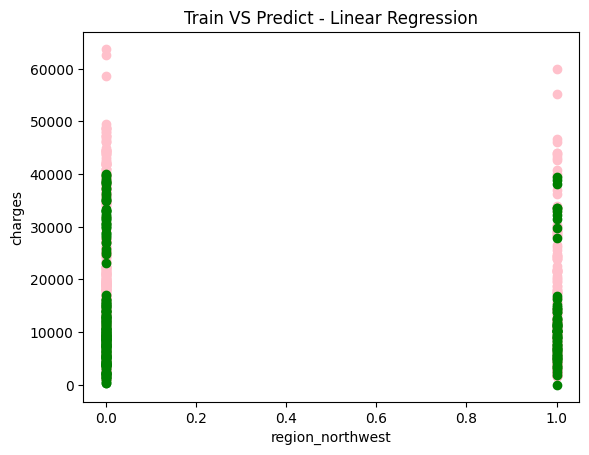

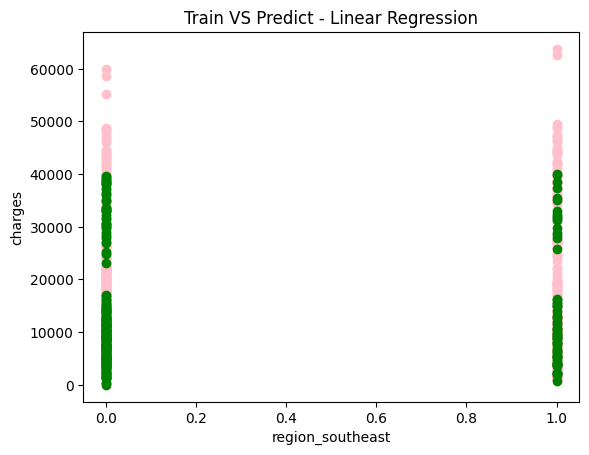

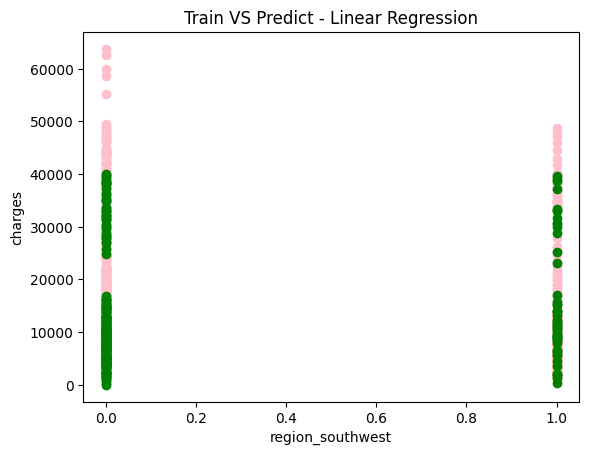

In [75]:
#For döngüsüyle tüm sütünlar için test ve training data karşılaştırmalı grafiği

for i in X_train.columns:
    plt.scatter(X_train[i], y_train, color="pink")
    plt.scatter(X_test[i], y_pred_test, color="green")
    plt.title("Train VS Predict - Linear Regression")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()


# **Ridge Regression**

In [76]:
ridge_model = Ridge(alpha=1)

ridge_model.fit(X_train,y_train)

y_pred_test = ridge_model.predict(X_test)


#Training data için R2 Skoru hesaplama
y_pred_train = ridge_model.predict(X_train)
r2_score_train_ridge = r2_score(y_train, y_pred_train)

#Testing data için R2 Skoru hesaplama
y_pred_test = ridge_model.predict(X_test)
r2_score_test_ridge = r2_score(y_test, y_pred_test)

#Root mean squared error (RMSE)
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_ridge))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_ridge))
print('RMSE : {0:.3f}'.format(rmse_ridge))

R2_score (Train Accuracy) : 0.737
R2_score (Test Accuracy) : 0.800
RMSE : 5646.607


In [77]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [78]:
# GridSearchCV ile hiperparametreleri optimize ediyorum.

parameters =  {  'model__alpha' : [43],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42]
}
regressor_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

In [79]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.8363491525351027
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [83]:
# Cross Validation test seti tahmin etme
cv_ridge = regressor_ridge.best_score_

# R2 Score Training data tahmin sonucu
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# R2 Score Testing data tahmin sonucu
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# RMSE sonucu
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

#Optimize edilen Ridge Regresyon metrikleri
print('CV: ', cv_ridge.mean())
print('R2_score (train): {0:.3f}'.format(r2_score_ridge_train))
print('R2_score (test): {0:.2f} '.format( r2_score_ridge_test))
print("RMSE: ", rmse_ridge)

CV:  0.8363491525351027
R2_score (train): 0.836
R2_score (test): 0.89 
RMSE:  4217.890666764235


# Ridge Regression final optimize R2 test skoru (Accuracy) : 0.89